In [1]:
# equal weighted portfolio of BTC, ETH and XRP, compare (1) average daily return, (2) Sharpe ratio

import pandas as pd

# Load data
btc_data = pd.read_csv("bitcoin_returns_10y.csv", parse_dates=['Date'], index_col='Date')
eth_data = pd.read_csv("eth_daily_returns.csv", parse_dates=['Date'], index_col='Date')
xrp_data = pd.read_csv("xrp_daily_returns.csv", parse_dates=['Date'], index_col='Date')

# Extract only the 'Daily Return' column from each dataset
btc_returns = btc_data[['Daily Return']].rename(columns={'Daily Return': 'BTC'})
eth_returns = eth_data[['Daily Return']].rename(columns={'Daily Return': 'ETH'})
xrp_returns = xrp_data[['Daily Return']].rename(columns={'Daily Return': 'XRP'})

# Merge datasets on Date, keeping only common dates
returns = btc_returns.join(eth_returns, how='inner').join(xrp_returns, how='inner').dropna()

# Compute equal-weighted daily return
returns['Portfolio'] = returns.mean(axis=1)

# Compute yearly statistics (mean return, standard deviation, Sharpe Ratio)
yearly_stats = returns.groupby(returns.index.year).agg(['mean', 'std'])
yearly_stats['Sharpe Ratio'] = yearly_stats[('Portfolio', 'mean')] / yearly_stats[('Portfolio', 'std')]

# Compute overall statistics
overall_avg_return = returns['Portfolio'].mean()
overall_std = returns['Portfolio'].std()
overall_sharpe_ratio = overall_avg_return / overall_std

# Compute BTC yearly statistics
btc_yearly_avg = returns['BTC'].groupby(returns.index.year).mean()
btc_yearly_std = returns['BTC'].groupby(returns.index.year).std()
btc_yearly_sharpe = btc_yearly_avg / btc_yearly_std

# Compute overall BTC statistics
btc_overall_avg = returns['BTC'].mean()
btc_overall_std = returns['BTC'].std()
btc_overall_sharpe_ratio = btc_overall_avg / btc_overall_std

# Combine all results into one table
final_results = pd.DataFrame({
    "Portfolio Average Return": yearly_stats[('Portfolio', 'mean')],
    "BTC Average Return": btc_yearly_avg,
    "Portfolio Sharpe Ratio": yearly_stats["Sharpe Ratio"],
    "BTC Sharpe Ratio": btc_yearly_sharpe
})

# Add overall statistics as a new row
final_results.loc["Overall"] = [
    overall_avg_return, btc_overall_avg, overall_sharpe_ratio, btc_overall_sharpe_ratio
]

# Export final results to CSV
final_results.to_csv("ew_results.csv")

print("Final results have been saved to 'ew_results.csv'.")

Final results have been saved to 'ew_results.csv'.


In [2]:
# price-weighted portfolio; same analysis

import pandas as pd

# Load data
btc_data = pd.read_csv("bitcoin_returns_10y.csv", parse_dates=['Date'], index_col='Date')
eth_data = pd.read_csv("eth_daily_returns.csv", parse_dates=['Date'], index_col='Date')
xrp_data = pd.read_csv("xrp_daily_returns.csv", parse_dates=['Date'], index_col='Date')

# Extract only the 'Daily Return' column from each dataset
btc_returns = btc_data[['Daily Return']].rename(columns={'Daily Return': 'BTC'})
eth_returns = eth_data[['Daily Return']].rename(columns={'Daily Return': 'ETH'})
xrp_returns = xrp_data[['Daily Return']].rename(columns={'Daily Return': 'XRP'})

# Merge datasets on Date, keeping only common dates
returns = btc_returns.join(eth_returns, how='inner').join(xrp_returns, how='inner').dropna()

# Compute market-cap weighted daily return using closing prices as weights
btc_weight = btc_data['Close'] / (btc_data['Close'] + eth_data['Close'] + xrp_data['Close'])
eth_weight = eth_data['Close'] / (btc_data['Close'] + eth_data['Close'] + xrp_data['Close'])
xrp_weight = xrp_data['Close'] / (btc_data['Close'] + eth_data['Close'] + xrp_data['Close'])

# Compute weighted portfolio return
returns['Portfolio'] = (returns['BTC'] * btc_weight) + (returns['ETH'] * eth_weight) + (returns['XRP'] * xrp_weight)

# Compute yearly statistics (mean return, standard deviation, Sharpe Ratio)
yearly_stats = returns.groupby(returns.index.year).agg(['mean', 'std'])
yearly_stats['Sharpe Ratio'] = yearly_stats[('Portfolio', 'mean')] / yearly_stats[('Portfolio', 'std')]

# Compute overall statistics
overall_avg_return = returns['Portfolio'].mean()
overall_std = returns['Portfolio'].std()
overall_sharpe_ratio = overall_avg_return / overall_std

# Compute BTC yearly statistics
btc_yearly_avg = returns['BTC'].groupby(returns.index.year).mean()
btc_yearly_std = returns['BTC'].groupby(returns.index.year).std()
btc_yearly_sharpe = btc_yearly_avg / btc_yearly_std

# Compute overall BTC statistics
btc_overall_avg = returns['BTC'].mean()
btc_overall_std = returns['BTC'].std()
btc_overall_sharpe_ratio = btc_overall_avg / btc_overall_std

# Combine all results into one table
final_results = pd.DataFrame({
    "Portfolio Average Return": yearly_stats[('Portfolio', 'mean')],
    "BTC Average Return": btc_yearly_avg,
    "Portfolio Sharpe Ratio": yearly_stats["Sharpe Ratio"],
    "BTC Sharpe Ratio": btc_yearly_sharpe
})

# Add overall statistics as a new row
final_results.loc["Overall"] = [
    overall_avg_return, btc_overall_avg, overall_sharpe_ratio, btc_overall_sharpe_ratio
]

# Export final results to CSV
final_results.to_csv("pw_results.csv")

print("Final results have been saved to 'pw_results.csv'.")

Final results have been saved to 'pw_results.csv'.


In [3]:
# Get MSTR price data and calculate 

import pandas as pd
import yfinance as yf

mstr_data = yf.download('MSTR', start='2015-01-27', end='2025-01-27')

mstr_data['Daily Return'] = mstr_data['Adj Close'].pct_change()

output_filepath = "mstr_daily_returns.csv"
mstr_data.to_csv(output_filepath)
print(f"Data with daily returns saved to: {output_filepath}")

[*********************100%***********************]  1 of 1 completed
Data with daily returns saved to: mstr_daily_returns.csv


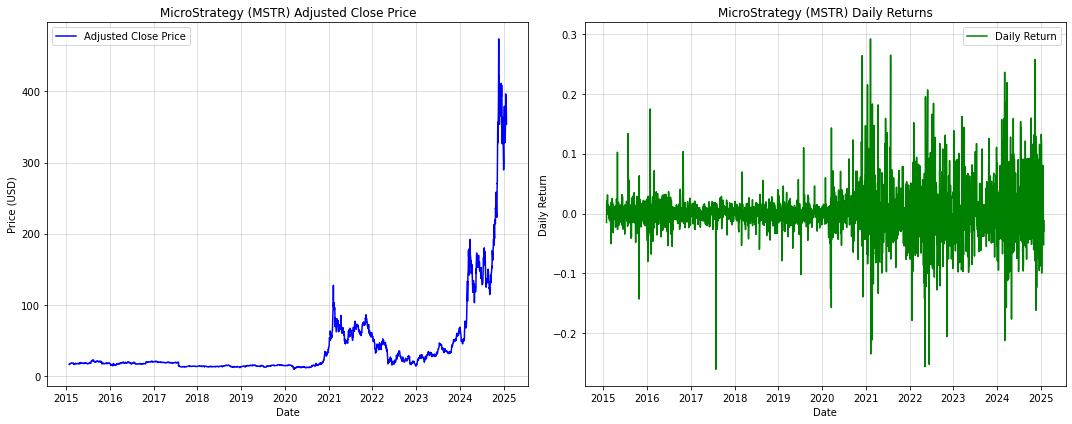

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved data
output_filepath = "mstr_daily_returns.csv"
mstr_data = pd.read_csv(output_filepath, parse_dates=['Date'])

# Ensure Date is the index
mstr_data.set_index('Date', inplace=True)

# Convert columns to numeric to avoid errors
mstr_data['Adj Close'] = pd.to_numeric(mstr_data['Adj Close'], errors='coerce')
mstr_data['Daily Return'] = pd.to_numeric(mstr_data['Daily Return'], errors='coerce')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

# Convert index to NumPy array before plotting
axes[0].plot(mstr_data.index.to_numpy(), mstr_data['Adj Close'].to_numpy(), label='Adjusted Close Price', color='blue')
axes[0].set_title("MicroStrategy (MSTR) Adjusted Close Price")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Price (USD)")
axes[0].grid(alpha=0.5)
axes[0].legend()

axes[1].plot(mstr_data.index.to_numpy(), mstr_data['Daily Return'].to_numpy(), label='Daily Return', color='green')
axes[1].set_title("MicroStrategy (MSTR) Daily Returns")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Daily Return")
axes[1].grid(alpha=0.5)
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import yfinance as yf

# Download historical data for MSTR
mstr_data = yf.download('MSTR', start='2015-01-27', end='2025-01-27')

# Calculate daily returns as percentage changes
mstr_data['Daily Return (%)'] = mstr_data['Adj Close'].pct_change() * 100

# Initialize variables
initial_capital = 1000  # Starting with $1,000
current_capital = initial_capital
holding_position = False  # Track if we're holding a position
trade_log = []

# Simulate the strategy
for i in range(1, len(mstr_data)):
    if not holding_position:
        # Check if the prior day's drop was >= 5% (buy signal)
        if mstr_data['Daily Return (%)'].iloc[i - 1] <= -5:
            try:
                # Buy at the next day's opening price
                buy_date = mstr_data.index[i]
                buy_price = mstr_data['Open'].iloc[i]
                holding_position = True  # Set position to holding
            except KeyError:
                # Handle missing data gracefully
                continue

    if holding_position:
        # Calculate the target sell price (5% above the buy price)
        target_price = buy_price * 1.04

        # Check if the closing price exceeds the target price
        if mstr_data['Close'].iloc[i] >= target_price:
            # Sell at today's closing price
            sell_date = mstr_data.index[i]
            sell_price = mstr_data['Close'].iloc[i]

            # Calculate profit and update capital
            profit = (sell_price - buy_price) / buy_price * current_capital
            current_capital += profit

            # Log the trade details
            trade_log.append({
                'Buy Date': buy_date,
                'Buy Price': buy_price,
                'Sell Date': sell_date,
                'Sell Price': sell_price,
                'Profit (%)': (sell_price - buy_price) / buy_price * 100,
                'Portfolio Value': current_capital
            })

            # Exit the position
            holding_position = False

# Convert trade log to a DataFrame
trade_results = pd.DataFrame(trade_log)

# Save the trade results to a CSV file
output_filepath = "mstr_trading_strategy_results.csv"
trade_results.to_csv(output_filepath, index=False)

# Display the trade results
print("Trade results saved to:", output_filepath)
print(trade_results)

# Final portfolio value
print(f"\nStarting with ${initial_capital}, your portfolio value at the end is: ${current_capital:.2f}")

[*********************100%***********************]  1 of 1 completed
Trade results saved to: mstr_trading_strategy_results.csv
     Buy Date   Buy Price  Sell Date  Sell Price  Profit (%)  Portfolio Value
0  2015-03-09   16.200001 2015-03-17   16.996000    4.913577      1049.135771
1  2015-10-28   16.825001 2015-10-28   17.885000    6.300145      1115.232847
2  2016-01-11   14.982000 2016-01-12   15.619000    4.251769      1162.649974
3  2016-02-08   15.453000 2016-02-29   16.089001    4.115710      1210.501273
4  2016-06-27   17.073000 2016-07-08   17.829000    4.428047      1264.102842
5  2016-08-01   17.431999 2016-10-28   19.146999    9.838230      1388.468186
6  2017-07-31   13.990000 2018-08-24   14.967000    6.983561      1485.432715
7  2019-01-31   12.594000 2019-02-05   13.215000    4.930922      1558.678241
8  2019-05-02   14.074000 2019-06-19   14.767000    4.923972      1635.427122
9  2019-07-09   12.594000 2019-07-31   13.673000    8.567576      1775.543579
10 2020-03-10  